In [1]:
import cv2
import numpy as np
import os
import torch
from model import EncoderCNN, DecoderRNN
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

version 2


In [2]:
embed_size = 256#<-
hidden_size = 512#<-
vocab_size = 9955
encoder_file = 'v3encoder-4.pkl' 
decoder_file = 'v3decoder-4.pkl'

In [ ]:
path=input()

In [3]:
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

DecoderRNN(
  (word_embeddings): Embedding(9955, 256)
  (lstm): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=9955, bias=True)
)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('', decoder_file)))
# Move models to GPU if CUDA is available.
encoder.to(device)
print(encoder.to(device))
decoder.to(device)
print(decoder.to(device))

EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

DecoderRNN(
  (word_embeddings): Embedding(9955, 256)
  (lstm): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=9955, bias=True)
)


In [6]:
dicctionary= pickle.load( open( "dicctionary.pkl", "rb" ) )

In [7]:
def clean_sentence(output,dicttionary):
    sentence=[]
    for i in output:
        sentence.append(dicctionary[i])
    indices = [i for i, s in enumerate(sentence) if '<end>' in s]
    sentence=sentence[1:indices[0]]
    sentence=' '.join(sentence)
    return sentence

example sentence: a man standing on a tennis court holding a racquet .


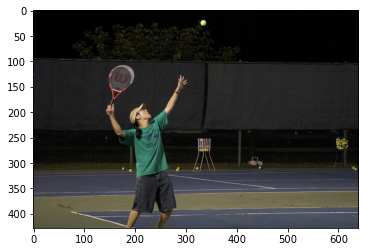

In [21]:
for file in np.random.choice(os.listdir(path), 1,replace=False):

    path_to_file=path+file
    imgoriginal=cv2.imread(path_to_file)
    im=imgoriginal.copy()
    im=im/255
    im=torch.tensor(im.transpose(2, 0, 1),dtype=torch.float32)
    encoder.eval()
    with torch.no_grad():
        image = im.to(device)
        # Obtain the embedded image features.
        features = encoder(image.unsqueeze(0)).unsqueeze(1)
        # Pass the embedded image features through the model to get a predicted caption.
    output = decoder.sample(features)
    sentence = clean_sentence(output,dicctionary)
    print('example sentence:', sentence)
    plt.imshow(cv2.cvtColor(imgoriginal, cv2.COLOR_BGR2RGB))
    plt.show()